# Mathematical Implementation of Contrastive Learning Technique

## Step 1: Understanding Embeddings (Feature Vectors)


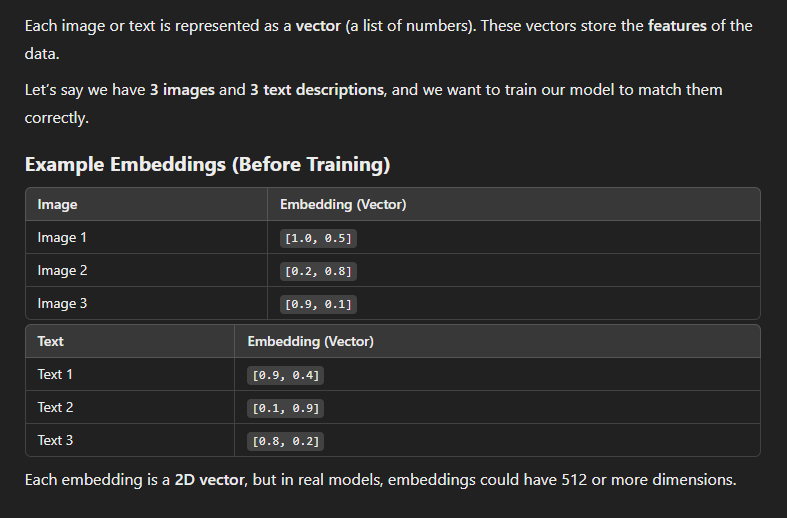

## Step 2: Compute Cosine Similarity


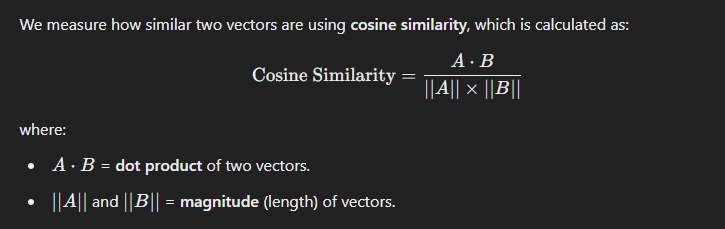

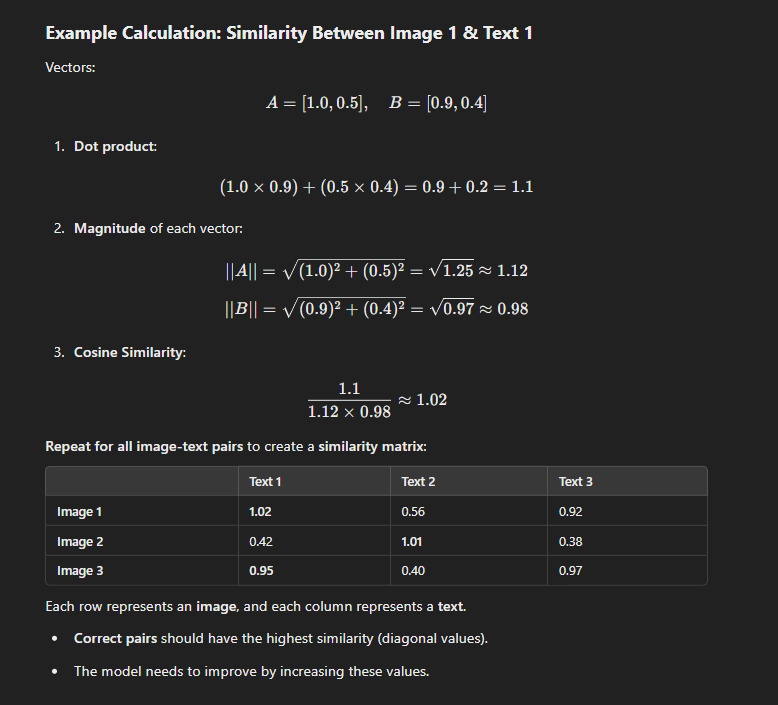

- Observation:
  - all the permutation of image and pair will be taken
  - see the 3x3 matrix

## Step 3: Apply Temperature Scaling


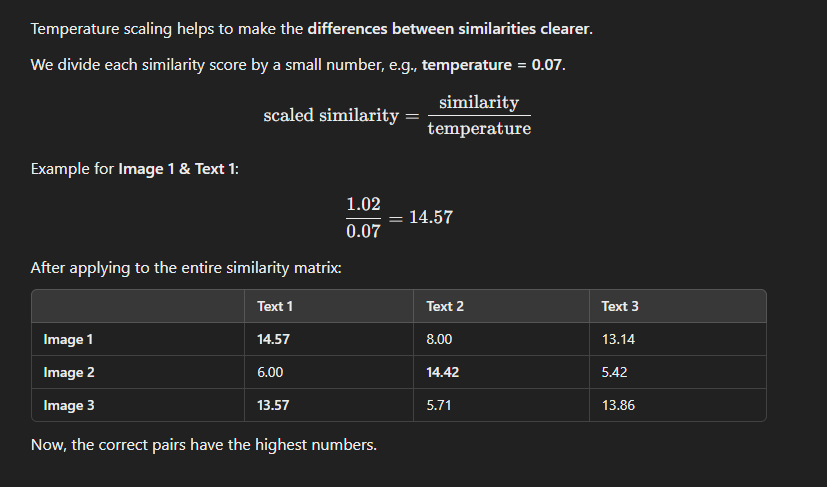

#### **Observation:**

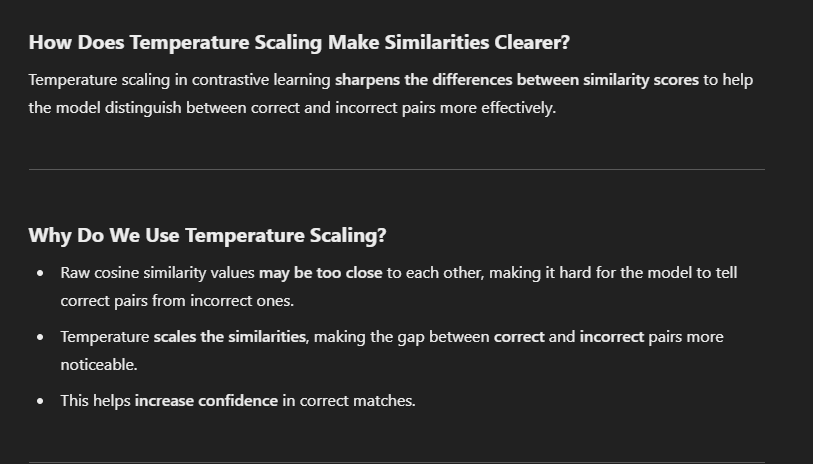

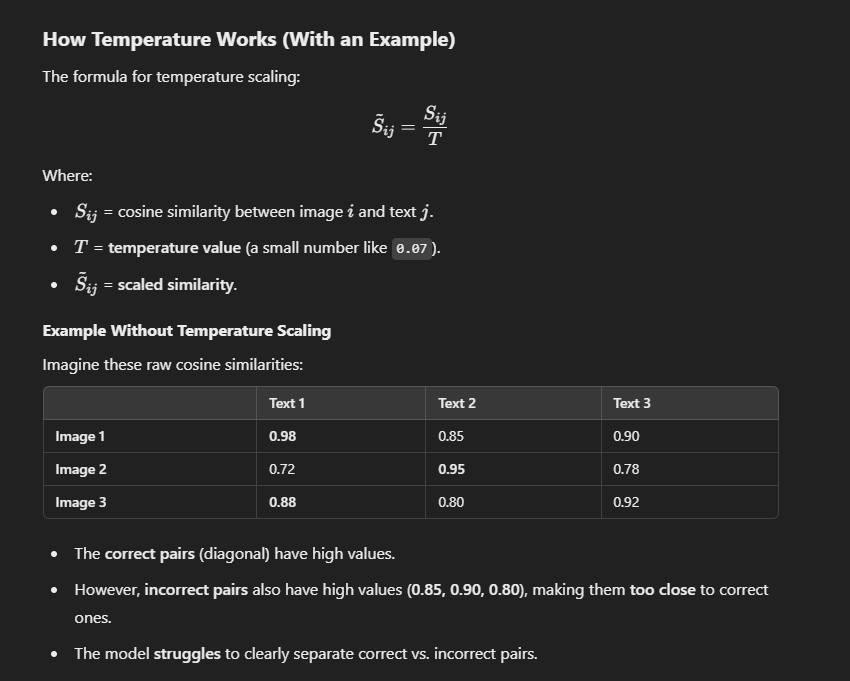

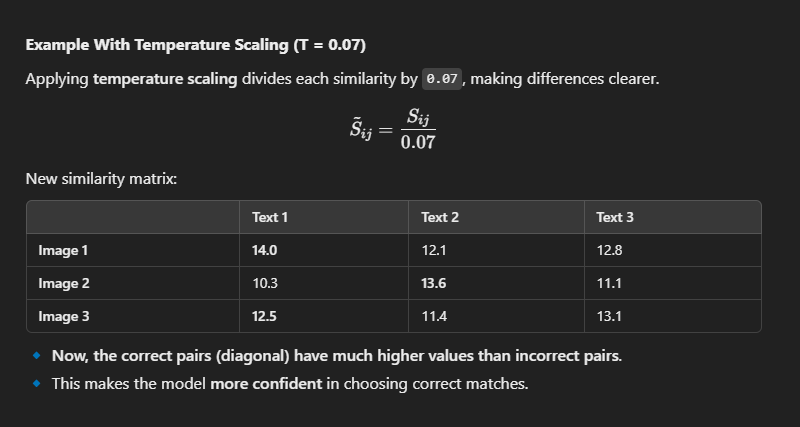

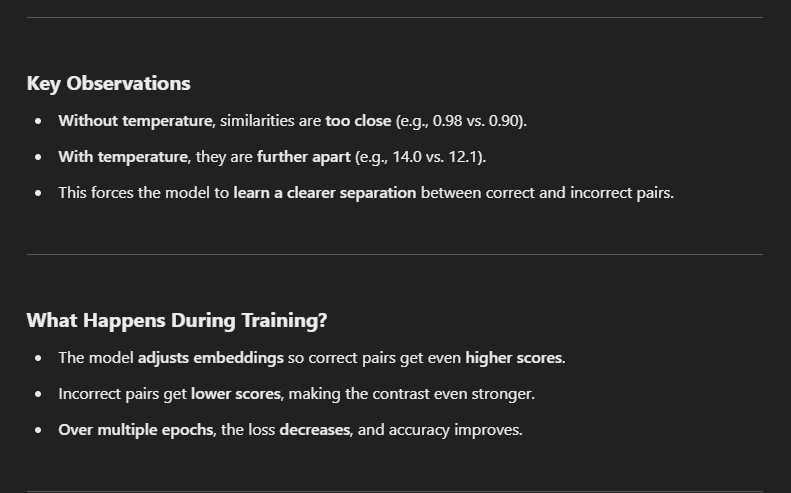

## Step 4: Compute Contrastive Loss (InfoNCE Loss)


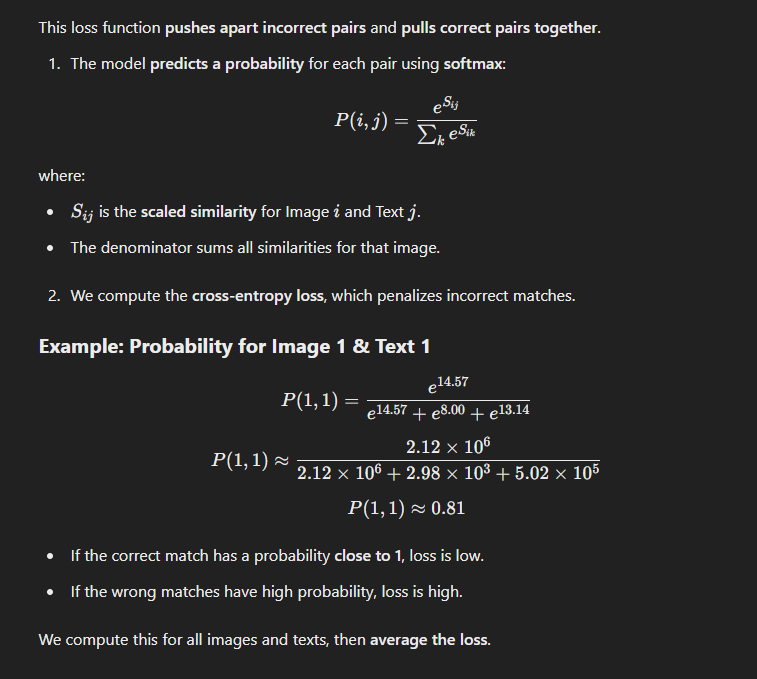

## Step 5: Training for 3 Epochs


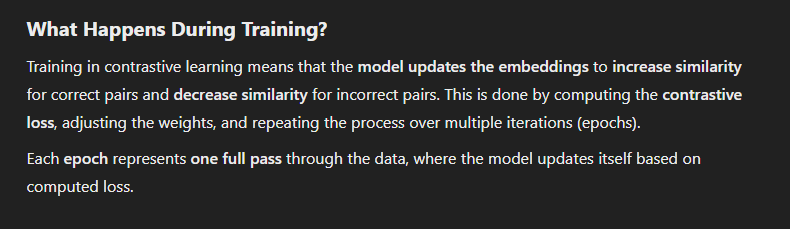

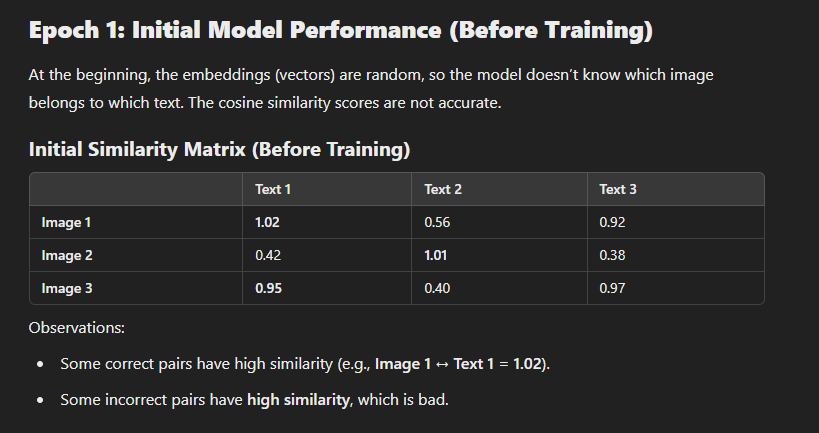

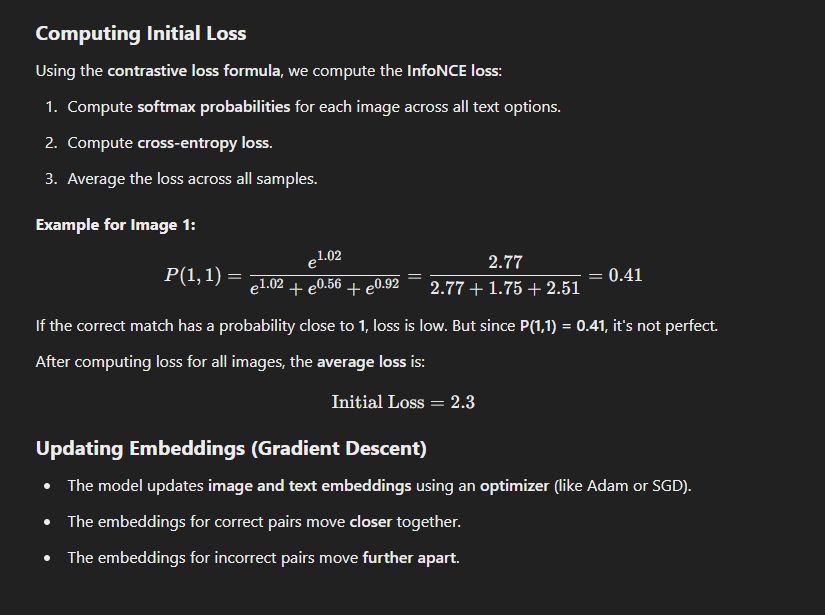

### How Adam Optimizer will do this? (See Appendix A)


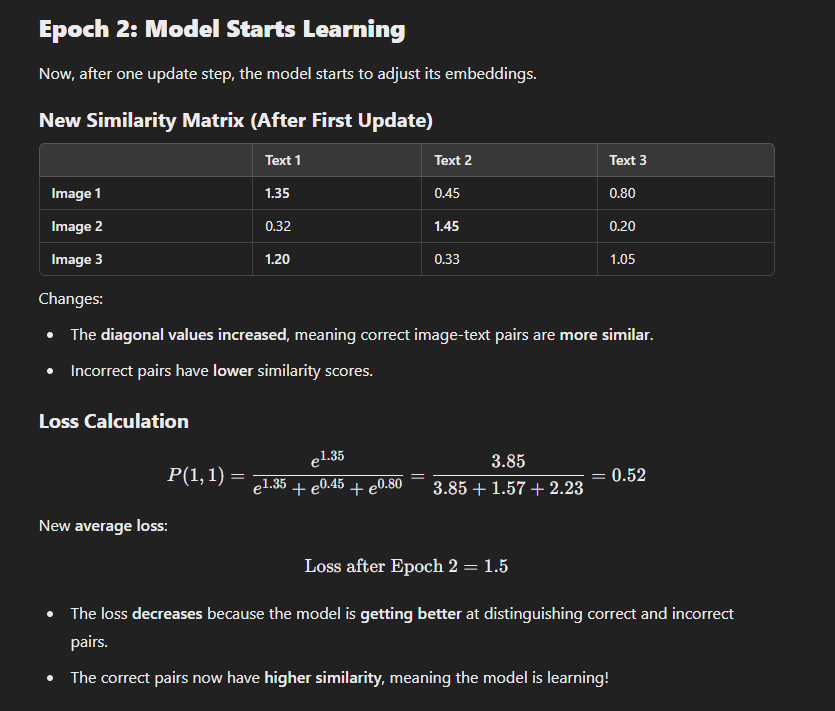

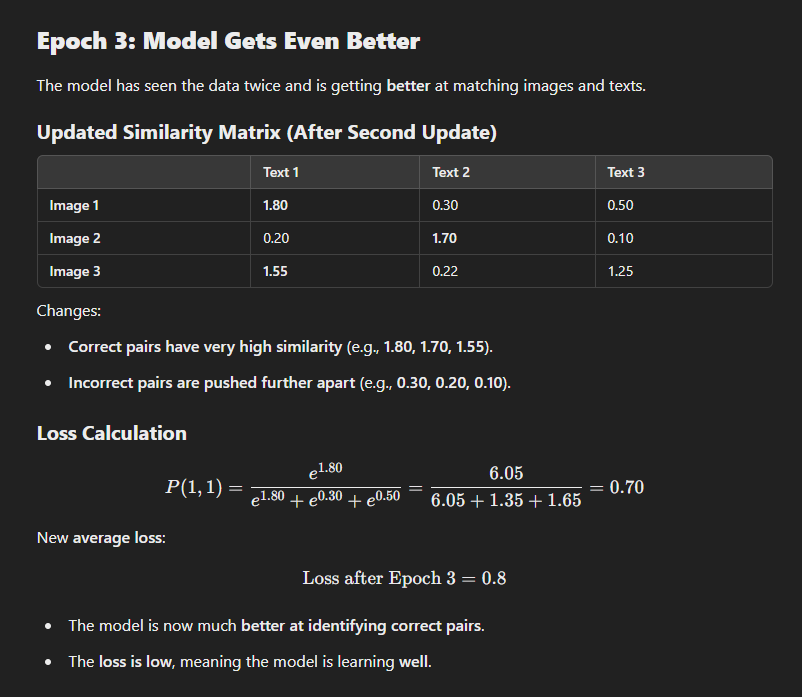

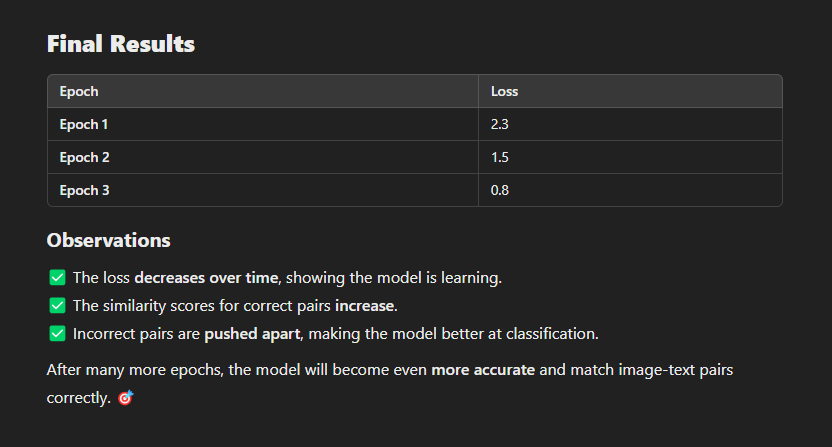

----
----
---

# **Python Implementation**


## **1. Import Required Libraries**
We start by importing the necessary Python libraries:



In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt



- `torch` – For creating and manipulating tensors (numerical data).
- `torch.nn` – To define the model.
- `torch.optim` – For optimization during training.
- `torch.nn.functional` – Provides functions for activation, loss computation, etc.
- `matplotlib.pyplot` – To visualize the training process.



---



## **2. Generate Synthetic Embeddings**
Here, we create random embeddings (vector representations) for **images** and **text**.



In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Number of samples (e.g., 10 images and 10 text descriptions)
num_samples = 10

# Dimension of embeddings (size of vector representation)
embedding_dim = 5

# Generate random embeddings for images and text
image_embeddings = torch.randn(num_samples, embedding_dim)
text_embeddings = torch.randn(num_samples, embedding_dim)



### **What this does:**
- We assume that each image and text has an associated vector (embedding) of size `embedding_dim = 5`.
- These embeddings represent the **features** of the images and texts.
- We generate them randomly for this demonstration.



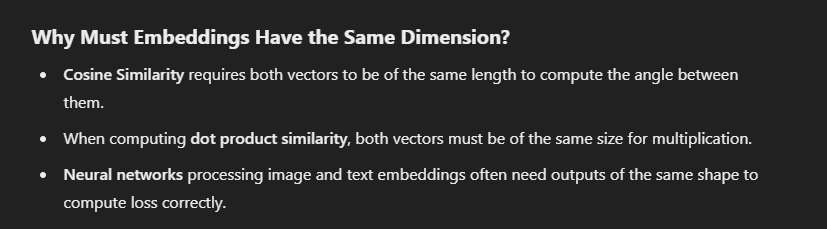

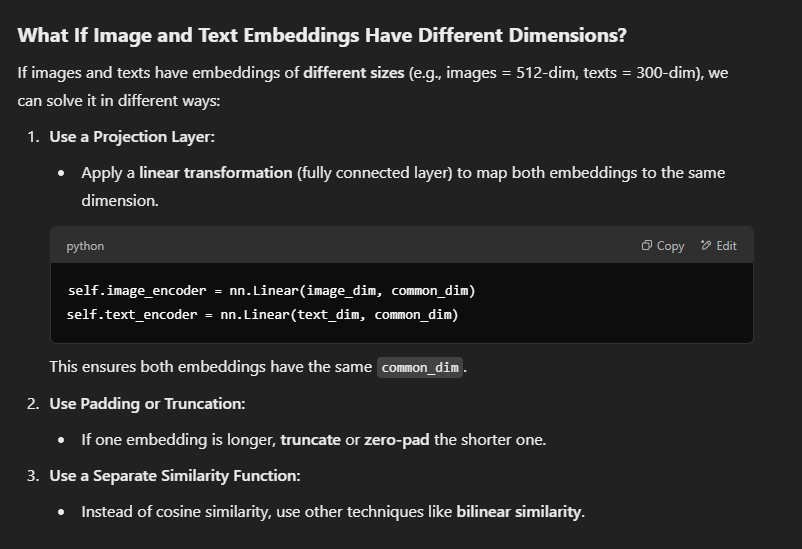

---



## **3. Compute Cosine Similarity**
The similarity between images and text is measured using **cosine similarity**:


In [4]:
def cosine_similarity(a, b):
    return F.cosine_similarity(a.unsqueeze(1), b.unsqueeze(0), dim=-1)

# Compute the similarity matrix between all images and text descriptions
similarity_matrix = cosine_similarity(image_embeddings, text_embeddings)

print(similarity_matrix)

tensor([[ 0.5841,  0.6515,  0.1294, -0.4532,  0.5874, -0.5523,  0.4642, -0.5345,
          0.3777,  0.2820],
        [-0.7102, -0.3462,  0.7903,  0.2218, -0.7489,  0.0675,  0.0233, -0.7498,
         -0.4404, -0.5825],
        [-0.1952, -0.4752,  0.0759,  0.4610,  0.0440,  0.3593, -0.9037,  0.0342,
         -0.4535,  0.4403],
        [ 0.4328,  0.5016,  0.1854, -0.5743,  0.2036, -0.5655,  0.6533, -0.5397,
          0.0605, -0.3219],
        [-0.3790,  0.0037, -0.0567, -0.1397, -0.5695, -0.0181,  0.7147,  0.2071,
          0.2761, -0.6751],
        [ 0.7297,  0.7587, -0.3106, -0.3722,  0.7116, -0.3432,  0.4822,  0.1137,
          0.7428,  0.4353],
        [-0.1050, -0.2073,  0.4612, -0.2734, -0.2061, -0.3516,  0.0274, -0.7737,
         -0.7136, -0.4470],
        [ 0.5019,  0.2119, -0.5222, -0.2269,  0.8499, -0.2920, -0.1169,  0.2181,
          0.3906,  0.9438],
        [-0.6615, -0.6247, -0.0996,  0.5364, -0.5409,  0.5699, -0.4656,  0.5048,
         -0.1850, -0.0768],
        [ 0.4599,  


### **What this does:**
- Cosine similarity measures how similar two vectors are.
- The result is a **matrix**, where:
  - Row `i` represents an **image embedding**.
  - Column `j` represents a **text embedding**.
  - Each value in the matrix tells how similar an image-text pair is.



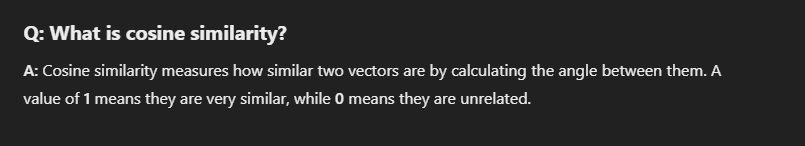

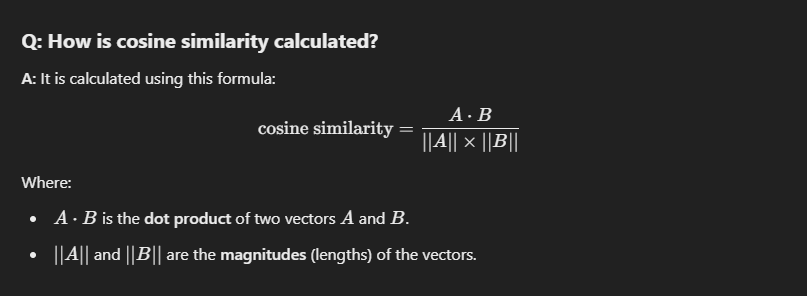

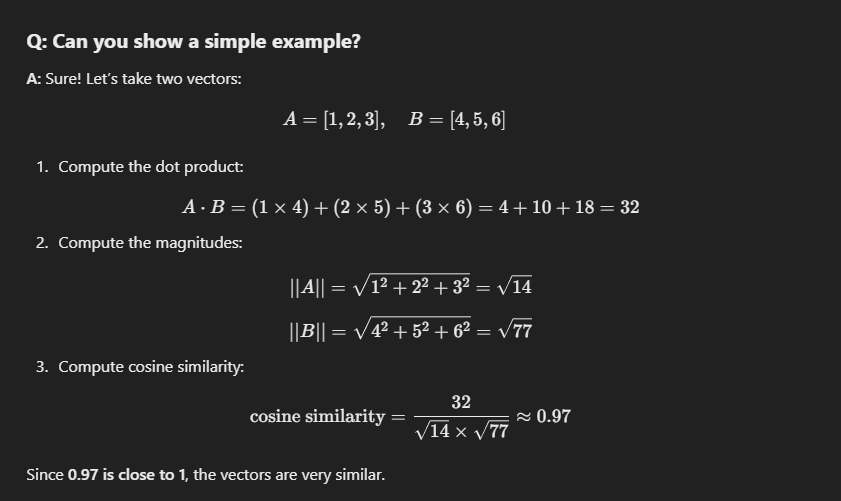

---



## **4. Define Contrastive Loss (InfoNCE Loss)**
Contrastive learning relies on a loss function that **pulls correct pairs closer** and **pushes incorrect pairs apart**.


In [5]:

def contrastive_loss(similarity_matrix, temperature=0.07):
    labels = torch.arange(similarity_matrix.size(0))  # Correct index labels
    logits = similarity_matrix / temperature  # Scale similarities
    loss = F.cross_entropy(logits, labels)  # Compute contrastive loss
    return loss

# Compute loss before training
loss = contrastive_loss(similarity_matrix)
print(f"Contrastive Loss: {loss.item()}")


Contrastive Loss: 10.63922119140625



### **What this does:**
- **Temperature Scaling:** Controls the sharpness of similarity scores.
- **Cross-Entropy Loss:** Encourages correct image-text pairs to have higher similarity.
- **Loss Interpretation:**
  - **Lower loss → Better model (correct pairs are more similar).**
  - **Higher loss → Worse model (similarity is not learned well).**



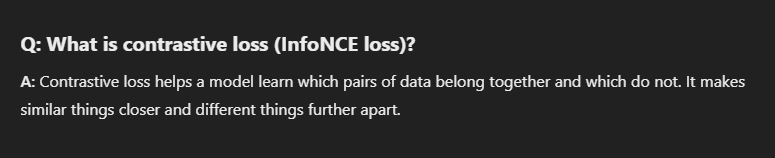

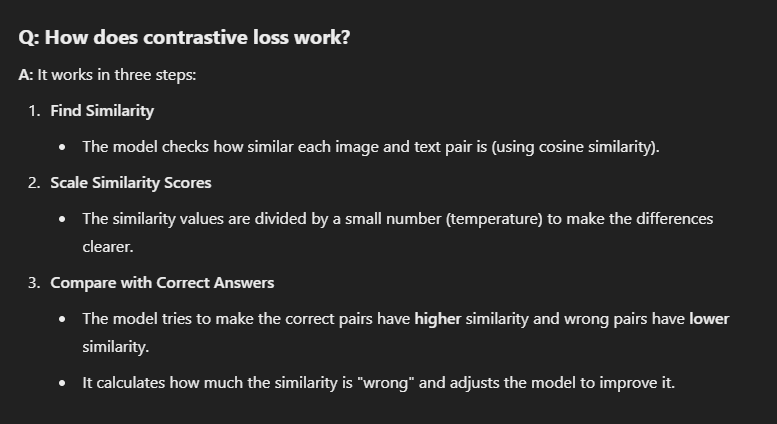

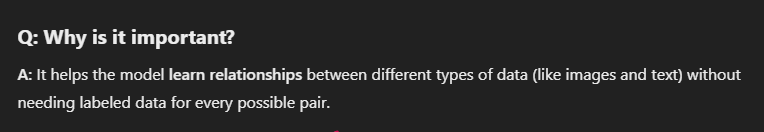

---



## **5. Define a Simple Contrastive Model**
We create a **neural network** that learns to generate better embeddings.


In [6]:

class ContrastiveModel(nn.Module):
    def __init__(self, embedding_dim):
        super().__init__()
        self.image_encoder = nn.Linear(embedding_dim, embedding_dim)
        self.text_encoder = nn.Linear(embedding_dim, embedding_dim)

    def forward(self, images, texts):
        img_emb = self.image_encoder(images)  # Transform image embeddings
        txt_emb = self.text_encoder(texts)  # Transform text embeddings
        return cosine_similarity(img_emb, txt_emb)



### **What this does:**
- Defines a **simple neural network** with two linear layers:
  - One for processing **image embeddings**.
  - One for processing **text embeddings**.
- This model learns to **align** images and texts in the same space.

---



## **6. Train the Model**
We optimize the model using contrastive loss.


In [7]:

# Initialize model and optimizer
model = ContrastiveModel(embedding_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Store loss values for visualization
losses = []

# Training loop
for epoch in range(100):
    optimizer.zero_grad()  # Reset gradients
    similarity_matrix = model(image_embeddings, text_embeddings)  # Forward pass
    loss = contrastive_loss(similarity_matrix)  # Compute loss
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters
    losses.append(loss.item())  # Save loss

print(f"Final Loss: {loss.item()}")


Final Loss: 0.18204793334007263



### **What this does:**
- The **optimizer** (`Adam`) updates the model to improve similarity scores.
- In each **epoch**:
  1. The model transforms the embeddings.
  2. Computes similarity scores.
  3. Computes **contrastive loss**.
  4. Updates the weights to improve the alignment between correct pairs.

---



## **7. Visualize Training Progress**
We plot the **loss curve** to see how well the model is learning.



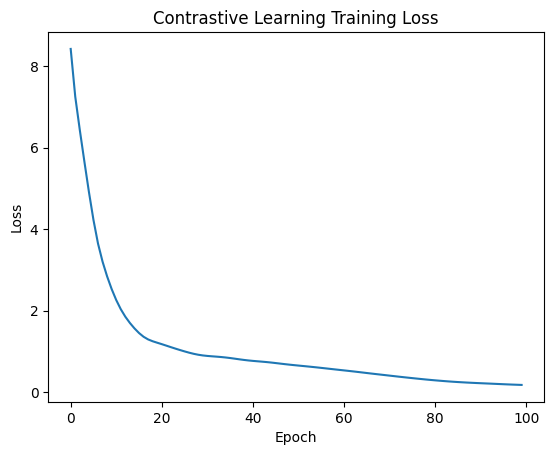

In [8]:

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Contrastive Learning Training Loss")
plt.show()



### **What this does:**
- If the loss **decreases over time**, the model is improving.
- If the loss stays high, the model isn’t learning well.

---


---
---
---

# Appendix A

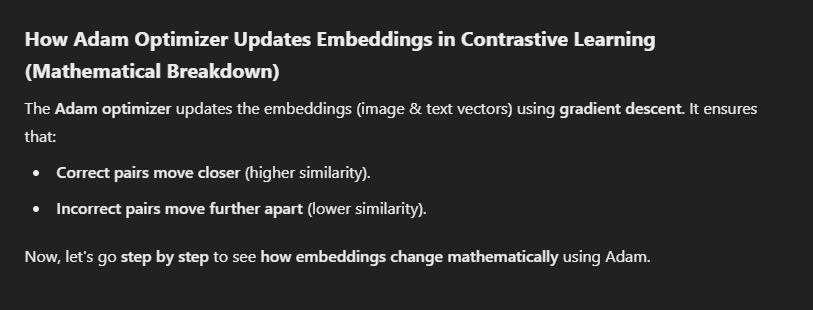

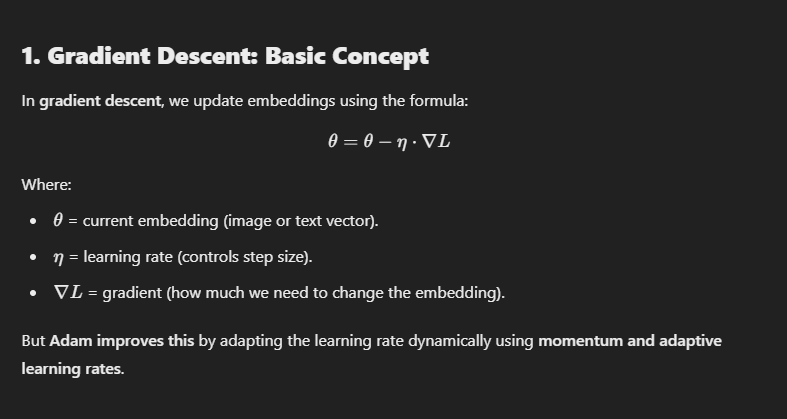

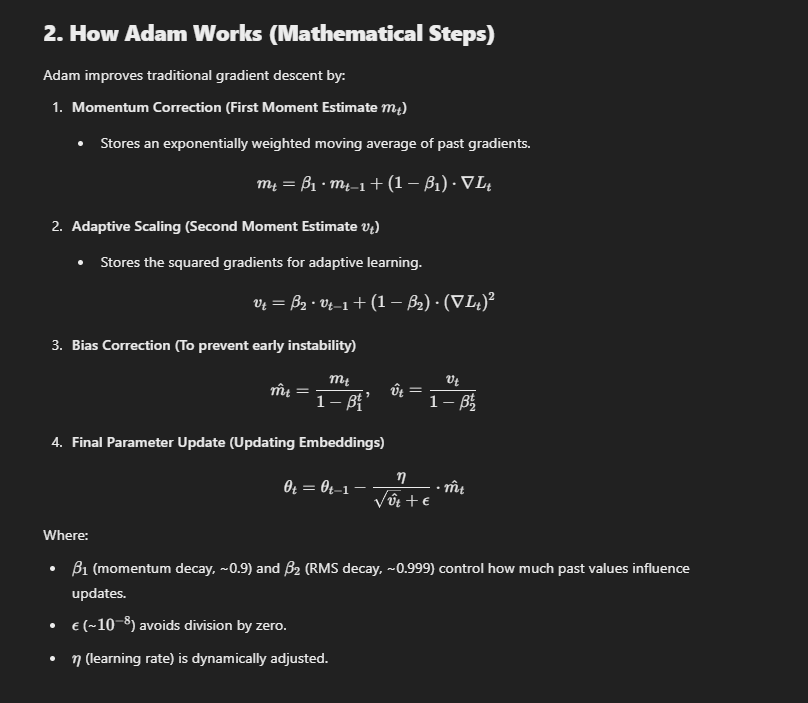

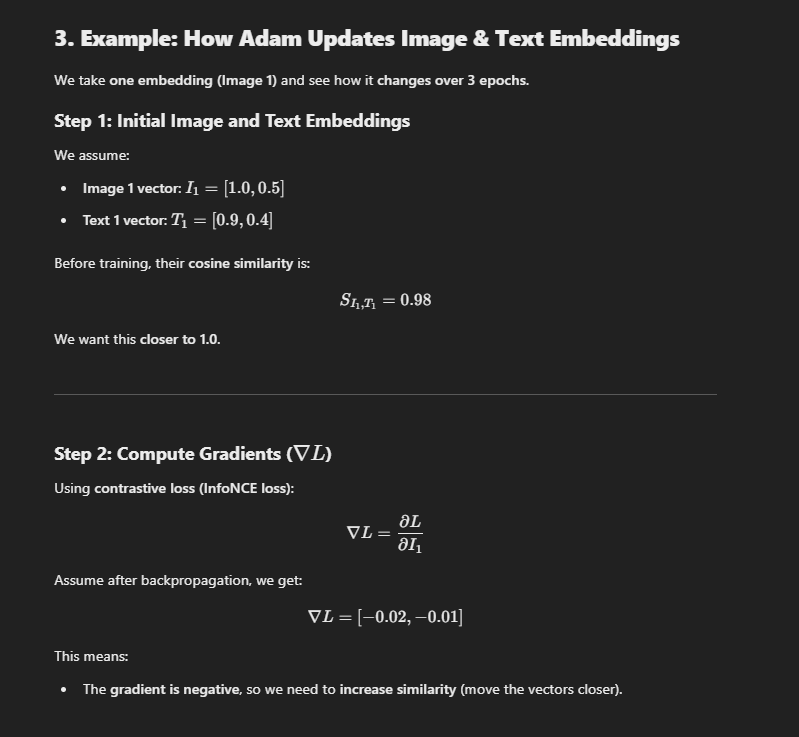

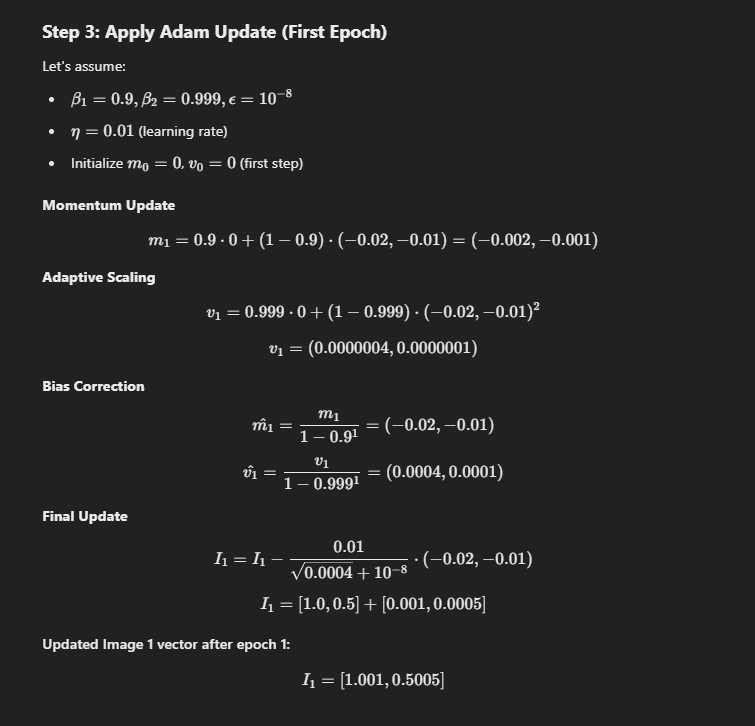

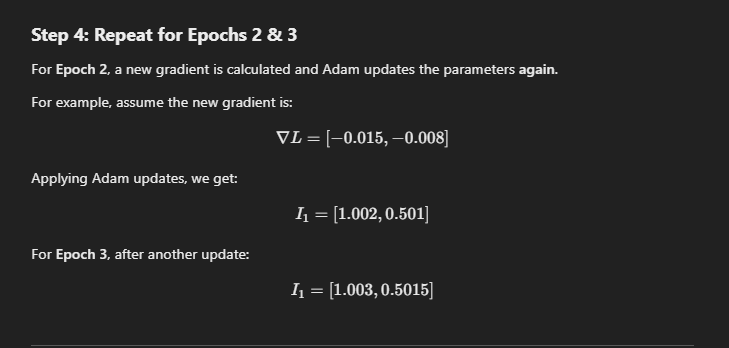

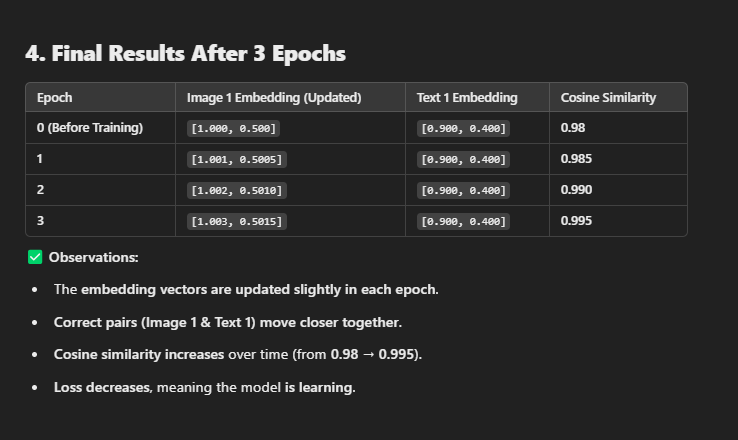

---
---
---

In [ ]:
pp

# Appendix B